# pyimagej
Pyimagej is a python library that allows to run ImageJ2 algorithms from python.

See also
* [pyimagej setup / test](pyimagej.md)
* [pyimagej documentation](https://github.com/imagej/pyimagej/tree/master/doc)
* [pyimagej tutorial at I2K2020](https://github.com/imagej/i2k-2020-pyimagej)

In [2]:
import imagej

# Start up ImageJ
ij = imagej.init()

Load example image from the web:

In [3]:
image = ij.io().open("https://fiji.sc/samples/blobs.png")

# This is necessary if we want to process the image in a specific format such as floating point number pixels:
image = ij.py.to_java(ij.py.from_java(image).astype('float'))

# print out image object / type
image

<java object 'net.imagej.DefaultDataset'>

This is how we can show an image in a notebook:

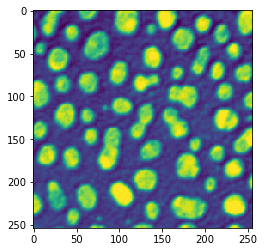

In [78]:
ij.py.show(image)

## Exporing existing functions
We can ask the operations help for key words and function names:

In [79]:
ij.op().help('gauss')

'Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.filter.gauss.DefaultGaussRA(
		RandomAccessibleInterval out,
		RandomAccessible in,
		double[] sigmas)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.GaussRAISingleSigma(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double sigma,
		OutOfBoundsFactory outOfBounds?)
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.gauss.DefaultGaussRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in,
		double[] sigmas,
		OutOfBoundsFactory outOfBounds?)'

After figuring out which parameter setting is the right for us, we can call these functions:

In [80]:
blurred = ij.op().filter().gauss(image, 5)
blurred

<java object 'net.imglib2.img.array.ArrayImg'>

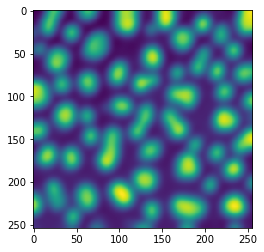

In [81]:
ij.py.show(blurred)

## Exercise: Deconvolution
In order to deconvolve the image above, we first need a kernel image, or Point-Spread-Function (`psf`). The `psf` corresponds to a single pixel with value = 1 surrounded by zeros, which has been blurred in the same way as the `blurred` image above.

In [82]:
import numpy as np
perfect_psf_numpy = np.zeros([31, 31])
perfect_psf_numpy[15, 15] = 1

perfect_psf_imagej = ij.py.to_java(perfect_psf_numpy)
type(perfect_psf_imagej)

<java class 'net.imglib2.python.ReferenceGuardingRandomAccessibleInterval'>

In [83]:
psf = ij.op().filter().gauss(perfect_psf_imagej, 5)

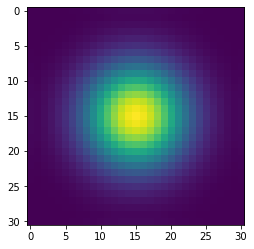

In [84]:
ij.py.show(psf)

The callenge is now to find the deconvoution command in ImageJ2. Hint: There is an implementation of the Richardson-Lucy algorithm.

See also:
* [Richardson-Lucy in ImageJ2 / ImageJ-Ops](https://imagej.net/libs/imagej-ops/deconvolution)
* [Richardson-Lucy on Wikipedia](https://en.wikipedia.org/wiki/Richardson%E2%80%93Lucy_deconvolution)

In [85]:
ij.op().help('richardsonLucy')

'Available operations:
	(RandomAccessibleInterval out) =
	net.imagej.ops.deconvolve.PadAndRichardsonLucy(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in1,
		RandomAccessibleInterval in2,
		long[] borderSize?,
		OutOfBoundsFactory obfInput?,
		OutOfBoundsFactory obfKernel?,
		RealType outType?,
		ComplexType fftType?,
		int maxIterations,
		boolean nonCirculant?,
		boolean accelerate?)
	(RandomAccessibleInterval out) =
	net.imagej.ops.deconvolve.RichardsonLucyC(
		RandomAccessibleInterval out,
		RandomAccessibleInterval in1,
		RandomAccessibleInterval in2,
		RandomAccessibleInterval fftInput?,
		RandomAccessibleInterval fftKernel?,
		boolean performInputFFT?,
		boolean performKernelFFT?,
		int maxIterations,
		UnaryInplaceOp accelerator?,
		UnaryComputerOp updateOp?,
		RandomAccessibleInterval raiExtendedEstimate?,
		ArrayList iterativePostProcessingOps?)'

In [90]:
deconvolved = ij.op().deconvolve().richardsonLucy(blurred, psf, 100)
deconvolved

[java.lang.Enum.toString] ConvolveFFTC: fftInput = ArrayImg [145x315], fftKernel = ArrayImg [145x315][java.lang.Enum.toString] 


<java object 'net.imglib2.img.array.ArrayImg'>

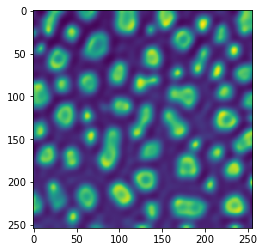

In [91]:
ij.py.show(deconvolved)